## Import Library Files

In [1]:
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

%matplotlib inline

In [3]:
! pip install newsapi-python

## News API configuration

In [4]:
api_key=os.getenv("NEWS_API")
from newsapi import NewsApiClient
newsapi=NewsApiClient(api_key=api_key)

## Fetch the Bitcoin news articles

In [10]:
coin_headlines = newsapi.get_top_headlines(q="blockchain", language="en", country="us")
coin_headlines

{'status': 'ok', 'totalResults': 0, 'articles': []}

**News API with function "get_top_headlines" with country as US did not return any results, hence used get_everything function and discarded country to get details about bitcoin**

In [11]:
bitcoin_headlines=newsapi.get_everything(q="blockchain",
                                         language="en",
                                         page_size=100,
                                         sort_by="relevancy")
bitcoin_headlines

{'status': 'ok',
 'totalResults': 3115,
 'articles': [{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
   'author': 'Catherine Shu',
   'title': 'Singapore’s government launches blockchain innovation program with $8.9 million in funding',
   'description': 'A group of Singaporean government agencies is launching a new research program for blockchain technology with $12 million SGD (about $8.9 million USD) in funding. Called the Singapore Blockchain Innovation Programme (SBIP), the project is a collaboration betw…',
   'url': 'http://techcrunch.com/2020/12/06/singapores-government-launches-blockchain-innovation-program-with-8-9-million-in-funding/',
   'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/12/GettyImages-149452864.jpg?w=585',
   'publishedAt': '2020-12-07T06:23:12Z',
   'content': 'A group of Singaporean government agencies is launching a new research program for blockchain technology with $12 million SGD (about $8.9 million USD) in funding. Called the Sing

In [12]:
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]

Total articles about Bitcoin: 3115


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Catherine Shu',
 'title': 'Singapore’s government launches blockchain innovation program with $8.9 million in funding',
 'description': 'A group of Singaporean government agencies is launching a new research program for blockchain technology with $12 million SGD (about $8.9 million USD) in funding. Called the Singapore Blockchain Innovation Programme (SBIP), the project is a collaboration betw…',
 'url': 'http://techcrunch.com/2020/12/06/singapores-government-launches-blockchain-innovation-program-with-8-9-million-in-funding/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/12/GettyImages-149452864.jpg?w=585',
 'publishedAt': '2020-12-07T06:23:12Z',
 'content': 'A group of Singaporean government agencies is launching a new research program for blockchain technology with $12 million SGD (about $8.9 million USD) in funding. Called the Singapore Blockchain Inno… [+2085 chars]'}

## Fetch the Ethereum news articles

In [13]:
Eth_headlines = newsapi.get_top_headlines(q="Ethereum", language="en", country="us")
Eth_headlines

{'status': 'ok', 'totalResults': 0, 'articles': []}

**News API with function "get_top_headlines" with country as US did not return any results for Ethereum, hence used "get_everything" function and discarded "country" to get details about Ethereum**

In [14]:
Ethereum_headlines=newsapi.get_everything(q="ethereum",
                                         language="en",
                                         page_size=100,
                                         sort_by="relevancy")
Ethereum_headlines

{'status': 'ok',
 'totalResults': 1347,
 'articles': [{'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - Reuters UK',
   'description': 'Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.',
   'url': 'https://in.reuters.com/article/us-crypto-currencies-idUKKBN2831RI',
   'urlToImage': 'https://static.reuters.com/resources/r/?m=02&d=20201123&t=2&i=1542157677&r=LYNXMPEGAM0XD&w=800',
   'publishedAt': '2020-11-23T14:16:00Z',
   'content': 'FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars]'},
  {'source': {'id': 'reuters', 'name': 'Reuters'},
   'author': 'Tom Wilson',
   'title': 'Smaller digital coins soar as bitcoin powers on towards record high - R

## Create dataframe for both Bitcoin and Ethereum articles

In [15]:
bitcoin_df = pd.DataFrame.from_dict(bitcoin_headlines["articles"])

bitcoin_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Catherine Shu,Singapore’s government launches blockchain inn...,A group of Singaporean government agencies is ...,http://techcrunch.com/2020/12/06/singapores-go...,https://techcrunch.com/wp-content/uploads/2020...,2020-12-07T06:23:12Z,A group of Singaporean government agencies is ...
1,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Mike Butcher,"As Crypto comes back, Binance-backed Injective...",Decentralized exchange protocols that allow cr...,http://techcrunch.com/2020/12/03/as-crypto-com...,https://techcrunch.com/wp-content/uploads/2020...,2020-12-03T18:18:48Z,Decentralized exchange protocols that allow cr...
2,"{'id': None, 'name': 'Gizmodo.com'}",John Biggs,Facebook’s Libra Seizes the Diem,We can’t blame you if you forgot about Faceboo...,https://gizmodo.com/facebook-s-libra-seizes-th...,https://i.kinja-img.com/gawker-media/image/upl...,2020-12-01T19:52:00Z,We cant blame you if you forgot about Facebook...
3,"{'id': 'reuters', 'name': 'Reuters'}",None,Malaysian crypto exchange says $3 billion bloc...,Malaysian crypto exchange says $3 billion bloc...,https://www.reuters.com/article/us-ccb-blockch...,None,2020-11-23T05:54:00Z,FILE PHOTO: A sign of China Construction Bank ...
4,"{'id': 'techcrunch', 'name': 'TechCrunch'}",Anthony Ha,"Odysee aims to build a more freewheeling, inde...",Odysee is a new video site that CEO Jeremy Kau...,http://techcrunch.com/2020/12/07/odysee-launch/,https://techcrunch.com/wp-content/uploads/2020...,2020-12-07T21:00:56Z,Odysee is a new video site that CEO Jeremy Kau...


In [16]:
ethereum_df = pd.DataFrame.from_dict(Ethereum_headlines["articles"])

ethereum_df.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:16:00Z,FILE PHOTO: Representation of the Ethereum vir...
1,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://www.reuters.com/article/us-crypto-curr...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:16:00Z,FILE PHOTO: Representation of the Ethereum vir...
2,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Smaller digital coins soar as bitcoin powers o...,Digital currencies Ethereum and XRP soared on ...,https://in.reuters.com/article/us-crypto-curre...,https://static.reuters.com/resources/r/?m=02&d...,2020-11-23T14:48:00Z,LONDON (Reuters) - Digital currencies Ethereum...
3,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Crypto exchange Coinbase hit by tech trouble a...,Major U.S. cryptocurrency exchange Coinbase sa...,https://in.reuters.com/article/crypto-currency...,https://static.reuters.com/resources/r/?m=02&d...,2020-12-16T16:35:00Z,FILE PHOTO: A representation of virtual curren...
4,"{'id': 'reuters', 'name': 'Reuters'}",Tom Wilson,Crypto exchange Coinbase hit by tech trouble a...,Major U.S. cryptocurrency exchange Coinbase sa...,https://www.reuters.com/article/crypto-currenc...,https://static.reuters.com/resources/r/?m=02&d...,2020-12-16T16:46:00Z,FILE PHOTO: Representations of virtual currenc...


# Sentiment Analyzer

In [17]:
import nltk
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\vinot\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Bitcoin sentiment analyzer

In [18]:
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_sent_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_sent_df = bitcoin_sent_df[cols]

bitcoin_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-12-07,A group of Singaporean government agencies is ...,0.0000,0.000,0.0,1.000
1,2020-12-03,Decentralized exchange protocols that allow cr...,0.4019,0.117,0.0,0.883
2,2020-12-01,We cant blame you if you forgot about Facebook...,0.1326,0.042,0.0,0.958
3,2020-11-23,FILE PHOTO: A sign of China Construction Bank ...,0.3182,0.065,0.0,0.935
4,2020-12-07,Odysee is a new video site that CEO Jeremy Kau...,0.7351,0.150,0.0,0.850


## Ethereum sentiment analyzer

In [19]:
ethereum_sentiments = []

for article in Ethereum_headlines["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_sent_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_sent_df = ethereum_sent_df[cols]

ethereum_sent_df.head()

,date,text,compound,positive,negative,neutral
0,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
1,2020-11-23,FILE PHOTO: Representation of the Ethereum vir...,0.0000,0.000,0.0,1.000
2,2020-11-23,LONDON (Reuters) - Digital currencies Ethereum...,0.4215,0.088,0.0,0.912
3,2020-12-16,FILE PHOTO: A representation of virtual curren...,0.0000,0.000,0.0,1.000
4,2020-12-16,FILE PHOTO: Representations of virtual currenc...,0.0000,0.000,0.0,1.000


In [20]:
bitcoin_sent_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.184906,0.069865,0.022510,0.907656
std,0.353171,0.086996,0.034956,0.094467
min,-0.440400,0.000000,0.000000,0.564000
25%,0.000000,0.000000,0.000000,0.853000
50%,0.038600,0.049500,0.000000,0.928000
75%,0.498075,0.132500,0.055500,1.000000
max,0.898600,0.372000,0.122000,1.000000


In [21]:
ethereum_sent_df.describe()

,compound,positive,negative,neutral
count,96.000000,96.000000,96.000000,96.000000
mean,0.243774,0.076313,0.016760,0.906927
std,0.328229,0.078305,0.040088,0.088970
min,-0.779200,0.000000,0.000000,0.653000
25%,0.000000,0.000000,0.000000,0.848750
50%,0.250000,0.070500,0.000000,0.926000
75%,0.493900,0.129000,0.000000,1.000000
max,0.883400,0.347000,0.239000,1.000000


## Questions

**Which coin had the highest mean positive score?**

Ethereum

**Which coin had the highest compound score?**

Bitcoin

**Which coin had the highest positive score?**

Bitcoin

# Tokenizer

In [30]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import nltk
nltk.download()
import re

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


In [31]:
lemmatizer = WordNetLemmatizer()

In [32]:
def tokenizer(text):
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    # Create a list of the words
    tokens = word_tokenize(re_clean)
    # Convert the words to lowercase
    tokens = [t.lower() for t in tokens]
    # Remove the punctuation
    words = [t.translate(str.maketrans('','')) for t in tokens]
    # Remove the stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]
    # Lemmatize Words into root words
    tokens = ', '.join([lemmatizer.lemmatize(word) for word in words])
    return tokens

In [33]:
bitcoin_df['tokens'] = bitcoin_df.apply(lambda x : tokenizer(x['description']), axis=1)
bitcoin_df[['description','tokens']]

,description,tokens
0,A group of Singaporean government agencies is ...,"group, singaporean, government, agency, launch..."
1,Decentralized exchange protocols that allow cr...,"decentralized, exchange, protocol, allow, cryp..."
2,We can’t blame you if you forgot about Faceboo...,"cant, blame, forgot, facebooks, libra, project..."
3,Malaysian crypto exchange says $3 billion bloc...,"malaysian, crypto, exchange, say, billion, blo..."
4,Odysee is a new video site that CEO Jeremy Kau...,"odyseeis, new, video, site, ceo, jeremy, kauff..."
...,...,...
95,The Vietnamese government has partnered with S...,"vietnamese, government, partnered, singaporeba..."
96,Image Source: morioh.com\nBlockchain is gettin...,"image, source, moriohcomblockchain, getting, s..."
97,The Graph seeks to create usable decentralized...,"graph, seek, create, usable, decentralized, in..."
98,Blockchain technology helped Honeywell’s GoDir...,"blockchain, technology, helped, honeywells, go..."


In [34]:
ethereum_df['tokens'] = ethereum_df.apply(lambda x : tokenizer(x['description']), axis=1)
ethereum_df[['description','tokens']]

TypeError: expected string or bytes-like object

# NGrams and Frequency Analysis

In [39]:
import nltk, re, string, collections
from nltk.util import ngrams
from nltk import ngrams
from collections import Counter

In [40]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

def bigram_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

def word_counter(corpus): 
    # Combine all articles in corpus into one large string
    big_string = ' '.join(corpus)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])


In [41]:
bit_count = bitcoin_df["description"]
bigram_counter(bit_count)

,bigram,count
0,"(digital, currency)",9
1,"(alltime, high)",6
2,"(told, reuters)",5
3,"(summary, list)",5
4,"(hong, kong)",5
5,"(price, bitcoin)",4
6,"(bitcoin, soar)",4
7,"(soar, chinese)",4
8,"(chinese, cryptocurrency)",4
9,"(cryptocurrency, asset)",4


In [25]:
eth_count = ethereum_df["description"]
bigram_counter(eth_count)

,bigram,count
0,"(bitcoin, ethereum)",6
1,"(digital, payment)",6
2,"(cryptocurrency, market)",6
3,"(customer, buy)",6
4,"(payment, company)",5
5,"(buy, sell)",5
6,"(paypal, holdings)",5
7,"(holdings, inc)",5
8,"(invest, ethereum)",5
9,"(ethereum, economy)",5


In [42]:
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    # Combine all articles in corpus into one large string
    big_string = ' '.join(tokens)
    processed = process_text(big_string)
    top = dict(Counter(processed).most_common(10))
    return pd.DataFrame(list(top.items()), columns=['word', 'count'])

In [43]:
tokens = bitcoin_df["description"]
token_count(tokens, N=10)

,word,count
0,blockchain,40
1,ha,19
2,bitcoin,16
3,cryptocurrency,15
4,digital,14
5,new,13
6,company,13
7,technology,10
8,year,10
9,crypto,9


In [28]:
tokens = ethereum_df["description"]
token_count(tokens, N=10)

,word,count
0,ethereum,53
1,bitcoin,32
2,cryptocurrency,20
3,paypal,18
4,ha,15
5,digital,14
6,market,12
7,company,11
8,price,11
9,blockchain,11


# Word Clouds

In [35]:
from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = [20.0, 10.0]

In [36]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\vinot\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

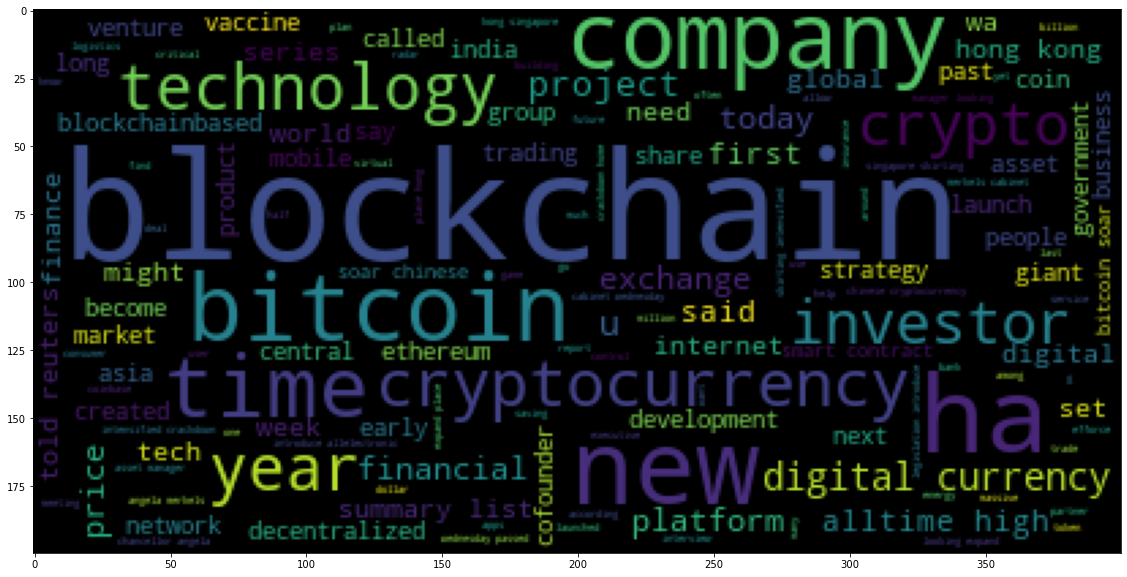

In [37]:
bit_cloud = bitcoin_df["description"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(bit_cloud)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.imshow(wc);

In [38]:
eth_colud = ethereum_df["description"]

def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

big_string = ' '.join(eth_colud)
input_text = process_text(big_string)

wc = WordCloud().generate(input_text)
plt.title("Ethereum Word Cloud")
plt.imshow(wc);

TypeError: sequence item 33: expected str instance, NoneType found

# Named Entity Recognition

In [33]:
import spacy
from spacy import displacy

In [34]:
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [35]:
bitcoin_concat = bitcoin_df['description'].str.cat(sep=', ')

In [36]:
bitcoin_ner = nlp(bitcoin_concat)
bitcoin_ner.user_data["title"] = "Bitcoin NER"

In [37]:
# Render the visualization
displacy.render(bitcoin_ner, style='ent')

In [38]:
from pprint import pprint
pprint([(X.text, X.label_) for X in bitcoin_ner.ents])

[('PayPal', 'ORG'),
 ('Paxos', 'ORG'),
 ('PayPal', 'PRODUCT'),
 ('U.S.', 'GPE'),
 ('PayPal', 'PRODUCT'),
 ('Bitcoin', 'GPE'),
 ('Ethereum', 'GPE'),
 ('Bitcoin Cash', 'PERSON'),
 ('Lite', 'PERSON'),
 ('Two days ago', 'DATE'),
 ('about $1 billion', 'MONEY'),
 ('bitcoin', 'GPE'),
 ('the Silk Road', 'FAC'),
 ('2013', 'DATE'),
 ('one', 'CARDINAL'),
 ('U.S.', 'GPE'),
 ('PayPal', 'PRODUCT'),
 ('one', 'CARDINAL'),
 ('PayPal', 'PRODUCT'),
 ('The Financial Crimes Enforcement Network', 'ORG'),
 ('$60 million', 'MONEY'),
 ('Larry Dean Harmon', 'PERSON'),
 ('Helix and Coin Ninja', 'WORK_OF_ART'),
 ('first', 'ORDINAL'),
 ('the United States', 'GPE'),
 ('2018', 'DATE'),
 ('2020', 'DATE'),
 ('Tesla Tequila', 'ORG'),
 ('April', 'DATE'),
 ('Elon Musk', 'ORG'),
 ('Teslaquila', 'WORK_OF_ART'),
 ('Tesla', 'ORDINAL'),
 ('one', 'CARDINAL'),
 ('U.S.', 'GPE'),
 ('Individual X', 'WORK_OF_ART'),
 ('years', 'DATE'),
 ('the Department of Jus', 'ORG'),
 ('Bitcoin', 'GPE'),
 ('3,200', 'MONEY'),
 ('late 2018', 'DATE'

## Ethereum NER

In [39]:
ethereum_concat = ethereum_df['description'].str.cat(sep=', ')

In [40]:
eth_ner = nlp(ethereum_concat)
eth_ner.user_data["title"] = "Ethereum NER"

In [41]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [42]:
from pprint import pprint
pprint([(X.text, X.label_) for X in eth_ner.ents])

[('PayPal', 'ORG'),
 ('Paxos', 'ORG'),
 ('PayPal', 'PRODUCT'),
 ('U.S.', 'GPE'),
 ('PayPal', 'PRODUCT'),
 ('Bitcoin', 'GPE'),
 ('Ethereum', 'GPE'),
 ('Bitcoin Cash', 'PERSON'),
 ('Lite', 'PERSON'),
 ('Arianee', 'PERSON'),
 ('PayPal', 'PERSON'),
 ('one', 'CARDINAL'),
 ('PayPal', 'PRODUCT'),
 ('app Ve', 'ORG'),
 ('2020', 'DATE'),
 ('Grayscale Investments', 'ORG'),
 ('Australia', 'GPE'),
 ('Reuters', 'ORG'),
 ('UK', 'GPE'),
 ('2020', 'DATE'),
 ('U.S.', 'GPE'),
 ('Wednesday', 'DATE'),
 ('morning', 'TIME'),
 ('Elon Musk', 'WORK_OF_ART'),
 ('Twitter', 'ORG'),
 ('Quibi', 'ORG'),
 ('PayPal', 'PRODUCT'),
 ('Netflix', 'PERSON'),
 ('Daily Crunch', 'WORK_OF_ART'),
 ('October 21, 2020', 'DATE'),
 ('app', 'ORG'),
 ('Jeffrey Katzenberg', 'PERSON'),
 ('PayPal', 'NORP'),
 ('Reuters', 'ORG'),
 ('Amazon', 'ORG'),
 ('Prime Day', 'DATE'),
 ('One', 'CARDINAL'),
 ('the Ledger Nano S', 'WORK_OF_ART'),
 ('39.99', 'MONEY'),
 ('Amazon', 'ORG'),
 ('PayPal Holdings Inc', 'ORG'),
 ('Wednesday', 'DATE'),
 ('U.S.', '